======================================================================================================

# KNN & PCA

======================================================================================================

In [1]:
import warnings

warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
import pandas as pd
import numpy as np
import os
import re
import random
import time
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
# import sklearn.grid_search

from src import fns_models as fns


% matplotlib inline

from subprocess import check_output
print(check_output(["ls", "data"]).decode("utf-8"))

athenaeum_authors.csv
athenaeum_authors_preview.csv
athenaeum_painting_filtered.csv
athenaeum_painting_movement.csv
athenaeum_painting_movement_test.csv
athenaeum_painting_movement_train.csv
athenaeum_paintings.csv
athenaeum_paintings_sizes.csv
color_hist_kmeans_206552.csv
color_histograms.csv
color_hist_size_206552.csv
complete_data.csv
extra_tree_com.csv
grad_boost_com.csv
images
images_athenaeum
images_sizes_2325.csv
model_accuracy.csv
nbc_com.csv
net_predicted.csv
painter_info_clean.csv
painting_info_clean.csv
pca20_kmeans_test.csv
pca20_kmeans_train.csv
resized_200
rf_com.csv
test_author200.csv
test_data.csv
test_hist_author_knn.csv
test_hist_author_rf.csv
train_author200.csv
train_data.csv
train_hist_author_knn.csv
train_hist_author_rf.csv
xgb_com.csv



In [3]:
train, train_labels, test, test_labels = fns.get_top_author(3)


[INFO] The size of train histogram for Random Forest(49890, 35)
[INFO] The size of test histogram for Random Forest(12473, 35)
24      1369
1793    1338
368     1335
Name: author_id, dtype: int64
[trian above] ==================================================[test below]
24      342
1793    335
368     334
Name: author_id, dtype: int64
(4042,)
(4042, 35)


In [4]:
train.head(3)


,hist_01,hist_02,hist_03,hist_04,hist_05,hist_06,hist_07,hist_08,hist_09,hist_10,...,hist_22,hist_23,hist_24,hist_25,hist_26,hist_27,hist_28,hist_29,hist_30,height_width_ratio
177,0.075736,0.001017,0.000195,0.000061,0.000091,0.000167,0.000124,0.000265,0.000814,0.010185,...,0.064973,0.155495,0.198439,0.022097,0.106906,0.188239,0.087873,0.033008,0.583974,1.984496
381,0.113157,0.100789,0.008086,0.001295,0.001914,0.004696,0.004417,0.011081,0.024289,0.064011,...,0.120838,0.122384,0.240406,0.066717,0.006814,0.036815,0.124549,0.168427,0.663395,1.565749
383,0.039886,0.167470,0.076083,0.001664,0.000785,0.000676,0.000319,0.000550,0.000656,0.002208,...,0.484468,0.307293,0.022210,0.002730,0.011258,0.037837,0.110167,0.263844,0.576894,1.412414


======================================================================================================

# KNN 

======================================================================================================

In [54]:
# random.seed(2017)

# X_trian, X_val, y_train, y_val = train_test_split(train, train_labels, test_size = 0.5, random_state=0)

# print "Length of Validation Set:" + str(len(y_val))
# print "Length of Train Set:" + str(len(y_train))
# print "Ratio: " + str(len(y_val) / float(len(y_train)))

In [5]:
import math

int(math.ceil(math.sqrt(len(train))))


64

In [7]:
## Train the KNN model
print "Training KNN Model..."

# minkowski_distance
k = [5, 10, 15, 20, 30, 40, 50, 64, 70, 80, 90, 100, 125, 200, 250]
#k = [5, 20]
parameters = {'n_neighbors': k, 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2, 9]}
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, parameters, cv=6, n_jobs=4)
clf

Training KNN Model...


GridSearchCV(cv=6, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'n_neighbors': [5, 10, 15, 20, 30, 40, 50, 64, 70, 80, 90, 100, 125, 200, 250], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'p': [1, 2, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [8]:
clf.fit(train, train_labels)
# accuracy for the test set
print "Accuracy of the Model on testing set:" + str(clf.score(test,test_labels))

# accuracy for the train set
print "Accuracy of the Model on training set:" + str(clf.score(train,train_labels))


Accuracy of the Model on testing set:0.707220573689
Accuracy of the Model on training set:0.705838693716


In [13]:
from sklearn.metrics import classification_report

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = test_labels, clf.best_estimator_.predict(test)
print(classification_report(y_true, y_pred))
print()

# n_neighbors': 30, 'algorithm': 'auto', 'p': 1}

Best parameters set found on development set:
()
{'n_neighbors': 30, 'algorithm': 'auto', 'p': 1}
()
Grid scores on development set:
()
0.644 (+/-0.040) for {'n_neighbors': 5, 'algorithm': 'auto', 'p': 1}
0.629 (+/-0.054) for {'n_neighbors': 5, 'algorithm': 'auto', 'p': 2}
0.602 (+/-0.049) for {'n_neighbors': 5, 'algorithm': 'auto', 'p': 9}
0.667 (+/-0.042) for {'n_neighbors': 10, 'algorithm': 'auto', 'p': 1}
0.648 (+/-0.056) for {'n_neighbors': 10, 'algorithm': 'auto', 'p': 2}
0.624 (+/-0.035) for {'n_neighbors': 10, 'algorithm': 'auto', 'p': 9}
0.672 (+/-0.037) for {'n_neighbors': 15, 'algorithm': 'auto', 'p': 1}
0.652 (+/-0.058) for {'n_neighbors': 15, 'algorithm': 'auto', 'p': 2}
0.633 (+/-0.037) for {'n_neighbors': 15, 'algorithm': 'auto', 'p': 9}
0.673 (+/-0.039) for {'n_neighbors': 20, 'algorithm': 'auto', 'p': 1}
0.657 (+/-0.048) for {'n_neighbors': 20, 'algorithm': 'auto', 'p': 2}
0.626 (+/-0.027) for {'n_neighbors': 20, 'algorithm': 'auto', 'p': 9}
0.675 (+/-0.041) for {'n_ne

In [23]:
y_true, y_pred = test_labels, loaded_knn_pca.best_estimator_.predict(test)


In [11]:
y_pred

array([  24, 1793, 1793, ..., 1793,   24, 1793])

In [24]:
knn_test_df = fns.result_table(y_true, y_pred)
knn_test_df = knn_test_df.rename(index=str, columns={'predictions': 'knn_pred', 'results': 'knn_res'})
knn_test_df

,actual,knn_pred,knn_res
33,24,24,True
34,1793,1793,True
35,1793,1793,True
37,1793,24,False
101,1793,368,False
102,1793,1793,True
105,1793,1793,True
217,1793,24,False
261,1793,1793,True
295,1793,368,False


In [15]:

knn_test_df.groupby(['actual', 'knn_pred']).aggregate({'knn_res': 'count'}).unstack()


knn_res          
knn_pred    24   368  1793
actual                    
24           248   49   45
368           49  252   33
1793          49   71  215

In [22]:
import pickle

# # save the model to disk
# filename = 'models/knn.sav'
# pickle.dump(clf, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_knn_pca = pickle.load(open(filename, 'rb'))
result = loaded_knn_pca.score(test, test_labels)
print(result)

0.707220573689


In [16]:

results = pd.DataFrame()

results.insert(0,'actual',test_labels)
results.insert(1,'predictions',y_pred)

misclassified = (results['actual'] != results['predictions']).mean()
misclassified

0.29277942631058357

In [ ]:
## Give me the 5 nearest neighbors of the first two items in the validation set
pd.concat((test_labels.iloc[:5].reset_index(drop = True), 
           pd.DataFrame(clf.kneighbors(test[0:5], n_neighbors=3, return_distance=False)).
        applymap(lambda x: fn_train.iloc[x])), axis = 1)

In [ ]:
# get neighbors 
prediction_nearest_neighbors = pd.DataFrame(clf.kneighbors(test, n_neighbors=107, return_distance=False))
prediction_nearest_neighbors

In [ ]:
nearest_neighbors = list(model.kneighbors(test_data_img[5], n_neighbors=31, return_distance=False)[0])
NN_images = [y_train.iloc[x] for x in nearest_neighbors]
[ (i,NN_images.count(i)) for i in set(NN_images) ]

======================================================================================================

# PCA

======================================================================================================

In [4]:
## Get 10 principal components
pca = PCA(n_components=15)
pca.fit(train)
pca_transformed = pca.transform(train)
pca_transformed_test = pca.transform(test)

0.98238212024365701

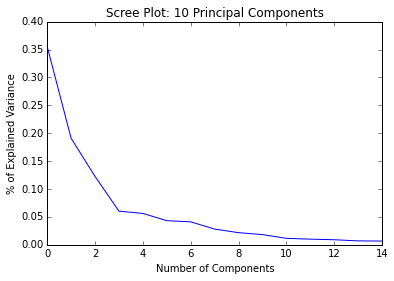

In [5]:
plt.plot(pca.explained_variance_ratio_)
plt.title("Scree Plot: 10 Principal Components")
plt.xlabel("Number of Components")
plt.ylabel("% of Explained Variance")
sum(pca.explained_variance_ratio_)

======================================================================================================

# KNN + PCA

======================================================================================================

In [6]:
## Train the KNN model
print "Training KNN Model..."

# minkowski_distance
k = [2, 3, 4, 5, 10, 15, 20]
#k = [5, 20]
parameters = {'n_neighbors': k, 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2, 9]
              }
knn_pca = KNeighborsClassifier()
clf_pca = GridSearchCV(knn_pca, parameters, cv=6, n_jobs=4)
clf_pca

Training KNN Model...


GridSearchCV(cv=6, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'n_neighbors': [2, 3, 4, 5, 10, 15, 20], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'p': [1, 2, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [7]:
start_time = time.time()

clf_pca.fit(pca_transformed, train_labels)

print('-' * 53)
print 'Costed time: \n%f' % (time.time() - start_time)


# accuracy for the train set
print "Accuracy of the Model on training set:" + str(clf_pca.score(pca_transformed,train_labels))

# accuracy for the test set
print "Accuracy of the Model on testing set:" + str(clf_pca.score(pca_transformed_test,test_labels))


-----------------------------------------------------
Costed time: 
443.537456
Accuracy of the Model on training set:0.703859475507
Accuracy of the Model on testing set:0.686449060336


In [15]:
from sklearn.metrics import classification_report

print("Best parameters set found on development set:")
print()
print(clf_pca.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf_pca.cv_results_['mean_test_score']
stds = clf_pca.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf_pca.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
knn_pca_true, knn_pca_pred = test_labels, clf_pca.best_estimator_.predict(pca_transformed_test)
print(classification_report(knn_pca_true, knn_pca_pred))
print()

# n_neighbors': 20, 'algorithm': 'auto', 'p': 2}

Best parameters set found on development set:
()
{'n_neighbors': 20, 'algorithm': 'auto', 'p': 2}
()
Grid scores on development set:
()
0.568 (+/-0.028) for {'n_neighbors': 2, 'algorithm': 'auto', 'p': 1}
0.580 (+/-0.024) for {'n_neighbors': 2, 'algorithm': 'auto', 'p': 2}
0.567 (+/-0.025) for {'n_neighbors': 2, 'algorithm': 'auto', 'p': 9}
0.607 (+/-0.025) for {'n_neighbors': 3, 'algorithm': 'auto', 'p': 1}
0.610 (+/-0.014) for {'n_neighbors': 3, 'algorithm': 'auto', 'p': 2}
0.606 (+/-0.038) for {'n_neighbors': 3, 'algorithm': 'auto', 'p': 9}
0.615 (+/-0.045) for {'n_neighbors': 4, 'algorithm': 'auto', 'p': 1}
0.624 (+/-0.029) for {'n_neighbors': 4, 'algorithm': 'auto', 'p': 2}
0.608 (+/-0.047) for {'n_neighbors': 4, 'algorithm': 'auto', 'p': 9}
0.622 (+/-0.041) for {'n_neighbors': 5, 'algorithm': 'auto', 'p': 1}
0.634 (+/-0.049) for {'n_neighbors': 5, 'algorithm': 'auto', 'p': 2}
0.621 (+/-0.034) for {'n_neighbors': 5, 'algorithm': 'auto', 'p': 9}
0.648 (+/-0.048) for {'n_neighbors':

In [16]:
pca_knn_test_df = fns.result_table(knn_pca_true, knn_pca_pred)
pca_knn_test_df = pca_knn_test_df.rename(index=str, columns={'predictions': 'knn_pca_pred', 'results': 'knn_pca_res'})
pca_knn_test_df

,actual,knn_pca_pred,knn_pca_res
33,24,24,True
34,1793,1793,True
35,1793,1793,True
37,1793,24,False
101,1793,1793,True
102,1793,1793,True
105,1793,1793,True
217,1793,24,False
261,1793,1793,True
295,1793,368,False


In [17]:
pca_knn_test_df.groupby(['actual', 'knn_pca_pred']).aggregate({'knn_pca_res': 'count'}).unstack()


knn_pca_res          
knn_pca_pred        24   368  1793
actual                            
24                   243   43   56
368                   54  229   51
1793                  37   76  222

In [25]:
knn_com = knn_test_df.merge(pca_knn_test_df, how='inner', on='actual')
knn_com

,actual,knn_pred,knn_res,knn_pca_pred,knn_pca_res
0,24,24,True,24,True
1,24,24,True,24,True
2,24,24,True,24,True
3,24,24,True,368,False
4,24,24,True,24,True
5,24,24,True,24,True
6,24,24,True,368,False
7,24,24,True,24,True
8,24,24,True,1793,False
9,24,24,True,24,True


In [26]:
knn_com.to_csv('data/knn_com.csv', index=False)


In [28]:
import pickle

# save the model to disk
filename = 'models/knn_pca.sav'
pickle.dump(clf_pca, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_knn_pca = pickle.load(open(filename, 'rb'))
result_pca = loaded_knn_pca.score(pca_transformed_test, test_labels)
print(result_pca)

0.686449060336


In [29]:
from sklearn.ensemble import BaggingClassifier

In [42]:
class_weights #dict
sample_weights = map(lambda x: class_weights[x], train_labels)

cls = BaggingClassifier(KNeighborsClassifier(n_neighbors=30, p = 1), n_estimators=20)
cls.fit(train, train_labels, sample_weights)

ValueError: The base estimator doesn't support sample weight

In [40]:
sample_weights = map(lambda x: class_weights[x], train_labels)
sample_weights

[0.78338847749592988,
 1.2399418121363259,
 0.78338847749592988,
 0.78338847749592988,
 1.2399418121363259,
 1.2399418121363259,
 1.0905070000365538,
 0.78338847749592988,
 1.2399418121363259,
 1.0905070000365538,
 1.0905070000365538,
 0.78338847749592988,
 0.78338847749592988,
 0.78338847749592988,
 1.0905070000365538,
 1.0905070000365538,
 0.78338847749592988,
 0.78338847749592988,
 1.2399418121363259,
 1.0905070000365538,
 0.78338847749592988,
 1.0905070000365538,
 1.2399418121363259,
 0.78338847749592988,
 1.0905070000365538,
 1.2399418121363259,
 1.2399418121363259,
 1.0905070000365538,
 0.78338847749592988,
 1.2399418121363259,
 0.78338847749592988,
 1.0905070000365538,
 1.0905070000365538,
 1.0905070000365538,
 0.78338847749592988,
 1.0905070000365538,
 1.2399418121363259,
 1.0905070000365538,
 1.0905070000365538,
 0.78338847749592988,
 1.0905070000365538,
 0.78338847749592988,
 1.2399418121363259,
 0.78338847749592988,
 1.2399418121363259,
 1.0905070000365538,
 1.09050700003655

In [33]:
def get_top_movement(num_movements = 3):
    movement_hist_train = pd.read_csv('data/movement_hist_train.csv')
    movement_hist_test = pd.read_csv('data/movement_hist_test.csv')
    
    print "[INFO] The size of train histogram for Random Forest" + str(movement_hist_train.shape)
    print "[INFO] The size of test histogram for Random Forest" + str(movement_hist_test.shape)

    movement_hist_train.iloc[:,3:-1] = movement_hist_train.iloc[:, 3:-1]\
        .apply(lambda x: x.astype(np.float) / (x.sum()/3), axis = 1, raw = True)

    movement_hist_test.iloc[:,3:-1] = movement_hist_test.iloc[:, 3:-1]\
            .apply(lambda x: x.astype(np.float) / (x.sum()/3), axis = 1, raw = True)
    
    mv_index = movement_hist_train['sup_art_movement'].value_counts().index[:num_movements]
    train = movement_hist_train[movement_hist_train['sup_art_movement'].isin(mv_index)]
    test = movement_hist_test[movement_hist_test['sup_art_movement'].isin(mv_index)]
    
    train_label = train['sup_art_movement']
    test_label = test['sup_art_movement']
    
    print 'top movement for train:\n %s ' % str(train['sup_art_movement'].value_counts())
    print '-' * 50
    print 'top movement for test:\n %s ' % str(test['sup_art_movement'].value_counts())

    test = test.drop(['author_id', 'painting_id', 'sup_art_movement'], axis=1)
    train = train.drop(['author_id', 'painting_id', 'sup_art_movement'], axis=1)
    
    return train, train_label, test, test_label


def movement_encod(train_labels, test_labels):
    from sklearn.preprocessing import LabelEncoder

    le = LabelEncoder()
    le.fit(train_labels)
    le.classes_
    train_labels_encd = le.transform(train_labels)
    test_labels_encd = le.transform(test_labels)
    
    print "[INFO] the original train labels: %s" % str(train_labels.unique())
    print "[INFO] the encoded labels: %s" % str(train_labels_encd)
    
    print '-' * 50
    print "[INFO] the original train labels: %s" % str(test_labels.unique())
    print "[INFO] the encoded labels: %s" % str(test_labels_encd)
    
    return train_labels_encd, test_labels_encd



In [34]:
train, train_labels_y, test, test_labels_y = get_top_movement(3)
train_labels, test_labels = movement_encod(train_labels_y, test_labels_y)


[INFO] The size of train histogram for Random Forest(67059, 34)
[INFO] The size of test histogram for Random Forest(28740, 34)
top movement for train:
 Impressionist    12694
Baroque           9119
Realist           8020
Name: sup_art_movement, dtype: int64 
--------------------------------------------------
top movement for test:
 Impressionist    5441
Baroque          3909
Realist          3438
Name: sup_art_movement, dtype: int64 
[INFO] the original train labels: ['Impressionist' 'Realist' 'Baroque']
[INFO] the encoded labels: [1 2 1 ..., 1 1 1]
--------------------------------------------------
[INFO] the original train labels: ['Impressionist' 'Baroque' 'Realist']
[INFO] the encoded labels: [1 0 2 ..., 2 2 2]


In [37]:
# movement_hist_train = pd.read_csv('data/movement_hist_train.csv')
counts = np.bincount(train_labels)
avg_count = counts.mean()
class_weights = avg_count / counts
class_weights = dict(zip(range(len(class_weights)), class_weights))
class_weights

{0: 1.0905070000365538, 1: 0.78338847749592988, 2: 1.2399418121363259}